# Problems Notebook for Applied Statistics 2025
The notebook summarizes my journey towards solving four problems set as part of the Applied Statistics module in the HDip in Computer Science and Data Analytics. The problems are:

1. Extending the Lady Tasting Tea Experiment
2. Normal distribution
3. t-Tests
4. ANOVA
 
## Standard packages used across the problems




`ipython`(https://ipython.org/)



`Numpy` is the standard package used for scientific computing in Python ([see the manual](https://numpy.org/doc/2.3/)). Numpy makes it easier to work with your data using [arrays](https://numpy.org/doc/2.3/user/absolute_beginners.html) to handle and understand your data.



`scipy`

`statsmodels`

`matplotlib` is a commmonly used package for creating visualisations of data in Python(https://matplotlib.org/stable/index.html). Visualisation of the data 

To ensure that all these packages are available in the environment do a `pip install`.

In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import matplotlib.pyplot as plt

`pandas`enables to the analysis and manipualtion of data (https://pandas.pydata.org/docs/). It is commonly used for working with tabular data.


In [3]:
import pandas as pd

`seaborn`


In [4]:
import seaborn as sns

`sympy`
`nose`
`scikit-learn`
`qiskit[visualization]`
`yfinance`

In [5]:
# Import the numpy library
import numpy as np

## Problem 1: Extending the Lady Tasting Tea
Firstly, what is the the Lady Tasting Tea Problem? This comes from the "Design of Experiments" by Ronald A Fisher and states a lady can work out from tasting a cup of tea if the milk was added to the cup before or after the tea. The experiment he designed was to create eight cups of tea, half made milk first and half made tea first, and presenting them in a random order to the taster. The taster has the experiment explained so knows that four are made milk first and four are tea first. 

The null hypothesis is that she can't tell the difference between the tea making methods. There is a good explanation of [null hypothesis here](https://www.geeksforgeeks.org/maths/null-hypothesis/) if this concept is new to you. This iteration of the experiment will extend the number of cups of tea to twelve with eight made tea-first and four made milk-first.

### Import the needed tools
To complete this task we are going to need to use some mathematical functions so import `math`. Documentation about `math` is available at [https://docs.python.org/3/library/math.html](https://docs.python.org/3/library/math.html). We will also use `itertools` to [create iterator blocks](https://docs.python.org/3/library/itertools.html#module-itertools). We will used `random` to randomly select which cups will have the milk added first. The full description of `random` is available at [https://docs.python.org/3/library/random.html](https://docs.python.org/3/library/random.html). Later I use `numpy` to evaluate the number of unique selections. `Numpy` is an incredibly useful package for scientific computing the [user guide](https://numpy.org/doc/2.3/user/index.html#user) is incredibly useful. Once the experiment is run incrementally, `matplotlib.pyplot` can be used to plot the outcomes as described in the [user guide](https://matplotlib.org/stable/index.html).

In [6]:
# Mathematical functions from the math module
# https://docs.python.org/3/library/math.html
import math

# Combinatorial functions from the itertools module
# https://docs.python.org/3/library/itertools.html#module-itertools
import itertools

# Random number generation functions from the random module
# https://docs.python.org/3/library/random.html
import random

# Numerical structures and functions from the numpy module
# https://numpy.org/doc/2.3/user/index.html#user
import numpy as np

# Plotting functions from the matplotlib module
# https://matplotlib.org/stable/index.html
import matplotlib.pyplot as plt

### Permutations and combinations
Permutations are the different ways the elements can be ordered. For example, your colleague has told you the combination for the lock on the stationery cupboard, you remember the digits are 1, 5, 7, 9, but not the order. None of the digits were repeated. The different orders of these digits are the permutations eg 1579, 1597, 9715...... The number of different ways of ordering these permutations is four factorial, often written as 4!. This is calculated by 4 * 3 * 2 * 1 = 24. It's going to take a while to get that stationery!

Combinations is a selection of a number of elements from the set. The order does not matter and the same element cannot be selected twice. If we take our stationery cuboard lock again adn all we know if no digit is repeated in the code, the how many combinations so we have? 1234, 1345, 1456 etc. The order does not matter in combinations.

How does this apply to our cups of tea experiment? First, let's set our variables. The number of cups of tea in total is twelve.

In [7]:
# Number of cups of tea in total
n_cups = 12

The number of the cups made tea-first is eight.

In [8]:
n_tea_first = 8

The number of the cups made milk-first is four.

In [9]:
n_milk_first = 4

How many different ways are there for the tester to select the four cups made tea first? In the [`math` library](https://docs.python.org/3/library/math.html) there is the [`comb`](https://docs.python.org/3/library/math.html#math.comb) function which will return the number of ways to choose a set number of items (often denoted as *k*) from *n* items without repeating items or order.  `math.comb()` is written mathematically as: $$\binom{n}{k} = \frac{n!}{k!(n-k)!}$$ In our example n = number of cups in total which is 12 and k = number of cups with milk in first which is 4. The description of `math.comb()` is available at [https://docs.python.org/3/library/math.html#math.comb](https://docs.python.org/3/library/math.html#math.comb).

Let's use the function to work out the number of ways of selecting four cups (those made milk-first) from twelve.

In [10]:
# Number of ways of selecting four cups from twelve.
# https://docs.python.org/3/library/math.html#math.comb
n_ways = math.comb(n_cups, n_milk_first)

# Show the result
n_ways

495

There are 495 different ways of selecting the four cups made milk first. So how does `math.comb` calculate this? If we label each of the cups one to twelve and put out four coasters, the tester is asked to put the milk-first cups on the coasters. For example, cups 3,4,7,11 might be selected. the cups could be placed on the coasters in any order, so 3 4 7 11 is the same and 7 4 11 3. Once a coaster is full it reduces the number of cups to choose from by one. To calculate the number of ways ofe selecting our four cups from twelve is to multiple the number of cups to choose from to fill each coaster. So for coaster A, there are 12 choice and coaster B 11 choices and so on.

In [11]:
# total ways of selecting 4 cups from 12
no_ways_ordered = 12 * 11 * 10 * 9

# Show the result
no_ways_ordered

11880

We don't care about the order so this reduces the number of options. The number of permutations for the four cups is 4! so 4 * 3 * 2 * 1

In [12]:
# Number of ways of putting the four cups on the coasters
n_arrangements = 4 * 3 * 2 * 1

# Show the result
n_arrangements

24

To get the number of ways of selecting the four cups with no regard to the other they are selected is calculated by dividing the number of ways ordered by the number of arrangements of those selected, so 11880 / 24. To divide in python we use [`//`](https://www.geeksforgeeks.org/python/division-operators-in-python/) when dividing whole numbers (integers).

In [13]:
# Number of combinations of selecting 4 cups from 12
n_combinations = no_ways_ordered // n_arrangements

# Show the result
n_combinations

495

This step by step approach matches the `math.comb()` function. This maths could also have been completed by using `math.factorial` described at [https://docs.python.org/3/library/math.html#math.factorial](https://docs.python.org/3/library/math.html#math.factorial). Factorial means multiplying from the start integer sequentially down to one. The notation is the start number followed by !. Therefore, the number of cups milk-first is calculated by 4! or 4 x 3 x 2 x 1. There is a good decription of factorial numbers at [https://www.geeksforgeeks.org/maths/factorial/](https://www.geeksforgeeks.org/maths/factorial/)

In [14]:
# Another way of calculating the number of arrangements of 4 cups is to use the factorial function from the math library
# https://docs.python.org/3/library/math.html#math.factorial
no_arrangements = math.factorial(n_milk_first)
no_arrangements

24

We need to know the number of ways of organising the tea-first cups.

In [15]:
# Calculate the number of ways of organising the tea first cups
no_ways_tea_first = math.factorial(n_tea_first)
no_ways_tea_first

40320

There are 12 cups, so work out the number of ways of calculating the ordering of the 12 cups, calculate `12!`.

In [16]:
# Calculate the number of ways of organising all the cups
no_ways = math.factorial(n_cups)
no_ways


479001600

To calculate the number of combinations of selecting the 4 cups from 12. We divide the number of ways of organising all the cups by the product of the number of arrangement of milk-first and tea-first.

In [17]:
# Calculate the number of combinations of selecting 4 cups from 12
number_combinations = no_ways // (no_arrangements * no_ways_tea_first)

# Show the result
number_combinations

495

Using this different methodology, we again get the answer 495. Now let's set up our extended experiment and simulate the outcomes.

### Setting up the experiment
The first task is the assignment labels to the cups. We use `range` to generate a sequence of numbers, up to the number of cups as described in the [user documentation](https://docs.python.org/3/library/functions.html#func-range). The output of this is then turned into a `list` which we can iterate through in later steps, [user documentation for lists](https://docs.python.org/3/library/stdtypes.html#typesseq-list).

In [18]:
# Assign the cup labels
# https://docs.python.org/3/library/stdtypes.html#typesseq-list
# https://docs.python.org/3/library/functions.html#func-range

labels = list(range(n_cups))

# Show the result
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

To calculate the number of way of selecting the number of cups made milk first out of all the cups we can use the function `itertools.combinations` ([official documentation])(https://docs.python.org/3/library/itertools.html#itertools.combinations). 

In [19]:
# Show the different ways of selecting the cups made milk first from all the cups
# https://docs.python.org/3/library/itertools.html#itertools.combinations
combs = list(itertools.combinations(labels, n_milk_first))

# Show the result
combs

[(0, 1, 2, 3),
 (0, 1, 2, 4),
 (0, 1, 2, 5),
 (0, 1, 2, 6),
 (0, 1, 2, 7),
 (0, 1, 2, 8),
 (0, 1, 2, 9),
 (0, 1, 2, 10),
 (0, 1, 2, 11),
 (0, 1, 3, 4),
 (0, 1, 3, 5),
 (0, 1, 3, 6),
 (0, 1, 3, 7),
 (0, 1, 3, 8),
 (0, 1, 3, 9),
 (0, 1, 3, 10),
 (0, 1, 3, 11),
 (0, 1, 4, 5),
 (0, 1, 4, 6),
 (0, 1, 4, 7),
 (0, 1, 4, 8),
 (0, 1, 4, 9),
 (0, 1, 4, 10),
 (0, 1, 4, 11),
 (0, 1, 5, 6),
 (0, 1, 5, 7),
 (0, 1, 5, 8),
 (0, 1, 5, 9),
 (0, 1, 5, 10),
 (0, 1, 5, 11),
 (0, 1, 6, 7),
 (0, 1, 6, 8),
 (0, 1, 6, 9),
 (0, 1, 6, 10),
 (0, 1, 6, 11),
 (0, 1, 7, 8),
 (0, 1, 7, 9),
 (0, 1, 7, 10),
 (0, 1, 7, 11),
 (0, 1, 8, 9),
 (0, 1, 8, 10),
 (0, 1, 8, 11),
 (0, 1, 9, 10),
 (0, 1, 9, 11),
 (0, 1, 10, 11),
 (0, 2, 3, 4),
 (0, 2, 3, 5),
 (0, 2, 3, 6),
 (0, 2, 3, 7),
 (0, 2, 3, 8),
 (0, 2, 3, 9),
 (0, 2, 3, 10),
 (0, 2, 3, 11),
 (0, 2, 4, 5),
 (0, 2, 4, 6),
 (0, 2, 4, 7),
 (0, 2, 4, 8),
 (0, 2, 4, 9),
 (0, 2, 4, 10),
 (0, 2, 4, 11),
 (0, 2, 5, 6),
 (0, 2, 5, 7),
 (0, 2, 5, 8),
 (0, 2, 5, 9),
 (0, 2, 5, 10),
 (

This has produced so many results I cannot see them all, let's use `len` to count the number of combinations. `len` counts the number of items in an object as decribed at [https://docs.python.org/3/library/functions.html#len](https://docs.python.org/3/library/functions.html#len)

In [20]:
# Number of combinations
# https://docs.python.org/3/library/functions.html#len
len(combs)

495

Brilliant, we got 495 combinations, the same as when we calculated the outcome purely mathematically by using `math.comb()`. 

To randomly choose which ones will have the milk added first use the python function `random.sample`, see the [official documentation](https://docs.python.org/3/library/random.html#random.sample). `random.sample()` will return a list items randomly selected from the group of the length specified. So the two arguments needed are what do you want me to select from and how many do you want. For this experiment the list is `labels` and the number to select is `n_milk_first`.

In [21]:
# Select which cups have milk added first
# https://docs.python.org/3/library/random.html#random.sample
labels_milk_first = random.sample(labels, n_milk_first)

# Show the result
labels_milk_first

[11, 6, 9, 1]

The cup number listed above, have been randomly chosen to be made milk-first. In selecting the cups, it does not matter the order they are selected, only that they are put in the group proposed as being made milk-first.

### The null hypothesis
A null hypothesis is the commonly accepted fact (the lady can tell which cups are made milk-first) and our experiment is designed to test whether this is true. The alternate hypothesis is that she cannot tell which are made milk-first and the selections are basically random. There is a great description of what is a null hypothesis and examples at [https://www.statisticshowto.com/probability-and-statistics/null-hypothesis/](https://www.statisticshowto.com/probability-and-statistics/null-hypothesis/).

Let's make our list of cups with the milk added first into a `set` ([official documentation])(https://docs.python.org/3/tutorial/datastructures.html#sets).

In [22]:
# Turn labels_milk_first into a set
# https://docs.python.org/3/tutorial/datastructures.html#sets
set_milk_first = set(labels_milk_first)

# Show the result
set_milk_first

{1, 6, 9, 11}

Now let's calculate the overlap between each element of the possible combinations saved as combs and set_milk_first. We can do this by first creating an empty list called no_overlaps.

In [23]:
# create an empty list to hold the number of overlaps
no_overlaps = []

Then loop through the combinations, in each loop take one of the combinations and turn it into a set and find out if there is an overlap with the milk-first set. The answer of this is then printed to the notebook, showing the combination, the number of overlapping items and which items overlap. The outcome of these calculations are added to the no_overlaps list.

In [24]:
# Loop through the combinations.
for comb in combs:
    # Turn comb into a set.
    s1 = set(comb)
    # Figure out where comb overlaps with set_milk_first.
    overlap = s1.intersection(set_milk_first)
    # Show the combination and the overlap.
    print(comb, len(overlap), overlap)
    # Append overlap to no_overlaps.
    no_overlaps.append(len(overlap))

(0, 1, 2, 3) 1 {1}
(0, 1, 2, 4) 1 {1}
(0, 1, 2, 5) 1 {1}
(0, 1, 2, 6) 2 {1, 6}
(0, 1, 2, 7) 1 {1}
(0, 1, 2, 8) 1 {1}
(0, 1, 2, 9) 2 {9, 1}
(0, 1, 2, 10) 1 {1}
(0, 1, 2, 11) 2 {1, 11}
(0, 1, 3, 4) 1 {1}
(0, 1, 3, 5) 1 {1}
(0, 1, 3, 6) 2 {1, 6}
(0, 1, 3, 7) 1 {1}
(0, 1, 3, 8) 1 {1}
(0, 1, 3, 9) 2 {9, 1}
(0, 1, 3, 10) 1 {1}
(0, 1, 3, 11) 2 {1, 11}
(0, 1, 4, 5) 1 {1}
(0, 1, 4, 6) 2 {1, 6}
(0, 1, 4, 7) 1 {1}
(0, 1, 4, 8) 1 {1}
(0, 1, 4, 9) 2 {9, 1}
(0, 1, 4, 10) 1 {1}
(0, 1, 4, 11) 2 {1, 11}
(0, 1, 5, 6) 2 {1, 6}
(0, 1, 5, 7) 1 {1}
(0, 1, 5, 8) 1 {1}
(0, 1, 5, 9) 2 {9, 1}
(0, 1, 5, 10) 1 {1}
(0, 1, 5, 11) 2 {1, 11}
(0, 1, 6, 7) 2 {1, 6}
(0, 1, 6, 8) 2 {1, 6}
(0, 1, 6, 9) 3 {9, 6, 1}
(0, 1, 6, 10) 2 {1, 6}
(0, 1, 6, 11) 3 {1, 11, 6}
(0, 1, 7, 8) 1 {1}
(0, 1, 7, 9) 2 {9, 1}
(0, 1, 7, 10) 1 {1}
(0, 1, 7, 11) 2 {1, 11}
(0, 1, 8, 9) 2 {9, 1}
(0, 1, 8, 10) 1 {1}
(0, 1, 8, 11) 2 {1, 11}
(0, 1, 9, 10) 2 {9, 1}
(0, 1, 9, 11) 3 {9, 11, 1}
(0, 1, 10, 11) 2 {1, 11}
(0, 2, 3, 4) 0 set()
(0, 2, 3, 5) 0 s

Due to the number of potential ways of selecting the four cups, this is a very long list. If we only print the number of overlaps we can see that getting more than two cups correctly identified as made milk-first is quite rare, but how rare.

In [25]:
# Show the overlaps
print(no_overlaps)

[1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 3, 2, 3, 1, 2, 1, 2, 2, 1, 2, 2, 3, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 2, 0, 1, 0, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 2, 0, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 2, 0, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 0, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 3, 2, 1, 0, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 3, 2, 3, 1, 2, 1, 2, 2, 1, 2, 2, 3, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 3, 2, 3, 1, 2, 1, 2, 2, 1, 2, 2, 3, 2, 2, 1, 1, 2, 1, 2, 2, 2, 3, 2, 3, 1, 2, 1, 2, 2, 1, 2, 2, 3, 2, 2, 2, 3, 2, 3, 1, 2, 1, 2, 2, 1, 2, 2, 3, 2, 2, 3, 2, 3, 3, 2, 3, 3, 4, 3, 2, 1, 2, 2, 3, 2, 2, 3, 2, 3, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 2, 0, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 2, 0, 1, 0, 1, 1, 0, 1, 1, 2, 

This can be calculated using the `numpy` function `unique`, see [official documentation](https://numpy.org/doc/stable/reference/generated/numpy.unique.html). `np.unique` identifies the unique values in the array and by adding the parameter `return_counts` we can see the number of times that unique value is returned. This is far easier than looking at a full list.

In [26]:
# Count the number of times each overlap occurs.
# https://numpy.org/doc/stable/reference/generated/numpy.unique.html
counts = np.unique(no_overlaps, return_counts=True)

# Show.
counts

(array([0, 1, 2, 3, 4]), array([ 70, 224, 168,  32,   1], dtype=int64))

To make this information even easier to understand we can plot it as a bar chart using `matplotlib.pyplot.subplots`, see [official documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html). The parameter `figsize` sets the size of the plot.

Then to this figure we plot our count data, setting the number of cups correctly identified as milk-first as the x-axis and the number of times that combination occurs on the y-axis.

Text(0.5, 0, 'Number of Cups Correctly Identified as Milk-First')

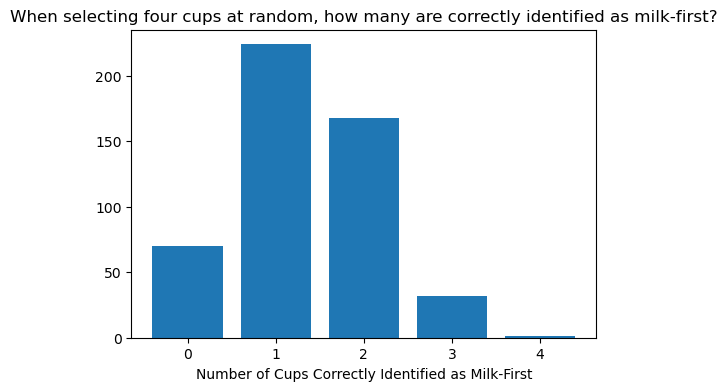

In [27]:
# Create a blank figure
fig, ax = plt.subplots(figsize=(6, 4))

# Create a bar chart with our count data
ax.bar(counts[0], counts[1])
plt.title('When selecting four cups at random, how many are correctly identified as milk-first?')
plt.xlabel('Number of Cups Correctly Identified as Milk-First')

From our count, it is clear there is only 1 way to get all four cups correctly identified. Using the `n-ways` variable created earlier we can see that the probability of making the selection with all four cups correctly identified as milk-first is quite rare.

In [28]:
# The probability of getting all four correct by chance is 1 in 495.
1/n_ways

0.00202020202020202

In the original experiment the probability of selecting all four cups correctly was 0.14, so this extension of the test has made it far harder to correctly identify the four cups made milk-first by chance alone. In the original experiment the chance of getting three or more cups correctly identified was 0.24 and hence Fisher said that all four cups must be correctly identified as being made milk-first to be significant. Let's see what the chance of 3 or more cups being correct is in our extended experiment.

In [29]:
# The probability of getting three or more correct by chance is
(1 + 33) / n_ways

0.06868686868686869

The probability of getting at least three cups correct in our extended experiments is 0.0687. 

When testing a null hypothesis we use the p-value. The smaller the p-value means the results may not support the null hypothesis. The cut-off used is often 0.05. How to calculate the p-value and its significance is well explained in [https://www.simplypsychology.org/p-value.html](https://www.simplypsychology.org/p-value.html) and we will be looking at this in more detail in the later problems. However, for the lady tasting experiment it is still unlikely that three cups are correctly identified as being made milk-first by chance, but it is over the normal 0.05 threshold, so to be confident that the null hypothesis is true we will still need to see all four cups correctly identified.

## Problem 2: Normal Distribution

'''Generate 100,000 samples of size 10 from the standard normal distribution. For each sample, compute the standard deviation with ddof=1 (sample SD) and with ddof=0 (population SD). Plot histograms of both sets of values on the same axes with transparency. Describe the differences you see. Explain how you expect these differences to change if the sample size is increased.'''

[Normal distribution](https://www.geeksforgeeks.org/maths/normal-distribution/) is the most common distribution of data variables. Normal distribution  is often used to represent a larger number of random variables and describes many natural phenomena such as the height of adults. The distribution is symmetrical about its centre and makes a distinctive bell curve.

In this problem we are going to look a flipping a coin 10 times in a row and see how many times in that set get get heads. We will simulate this happening 100,000 times. First let's import the tools we need:
* `numpy` to allow us to work with the binomial distribution of flipping the coin eg heads or tails
* `matplotlib.pyplot` to plot the data
* `scipy.stats` for statistics
* `statsmodels` for the statistical modelling

In [30]:
# Binomial distribution of flipping a coin
import numpy as np

# Plotting functions from the matplotlib module
# https://matplotlib.org/stable/index.html
import matplotlib.pyplot as plt

# Statistical functions from the scipy.stats module
# https://docs.scipy.org/doc/scipy/reference/stats.html
import scipy.stats as stats

# Statistical modelling functions from the statsmodels module
import statsmodels as sm

### Flipping one coin
Let's start simply with flipping one coin. We can do this using the `numpy` function `random.binomial`, see [official documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html).  `Binomial` sets the outputs to either one or zero to represent the two classes, heads or tails. `random` makes random selections of the output. The `binomial` function must have the parameters, n and p, where n is an integer and p is any decimal (float) from 0.0 to 1.0. There is an additional parameter for size, one answer is returned if no value is given.

On a fair coin the chances of getting heads is 0.5. So our parameters are 1, for 1 coin and 0.5 for the chances of getting heads.

In [31]:
# Flip a single coin with 50% chance of heads
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html

np.random.binomial(1, 0.5)

1

To flip a single coin multiple times, we add the number of flips to the parameters. Let's flip the coin 1,000 times and plot it to show that the coin is flipping fairly.

In [32]:
# Flipping a fair coin 1000 times
flips = np.random.binomial(1, 0.5, 1000)

# Show the result
flips

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,

To count the number of times a head appears we can `sum` the array as the outcomes are simply 1 or 0, see the [official documentation for sum](https://docs.python.org/3.11/library/functions.html#sum)

In [33]:
# Count the number of time a head appears using sum
# https://docs.python.org/3.11/library/functions.html#sum
heads = flips.sum()

# Show the result
heads

476

So from our 1,000 coin flips we got heads, nearly 50% of the time.

Now let's plot the data using `matplotlib.pyplot`.

Text(0, 0.5, 'Count')

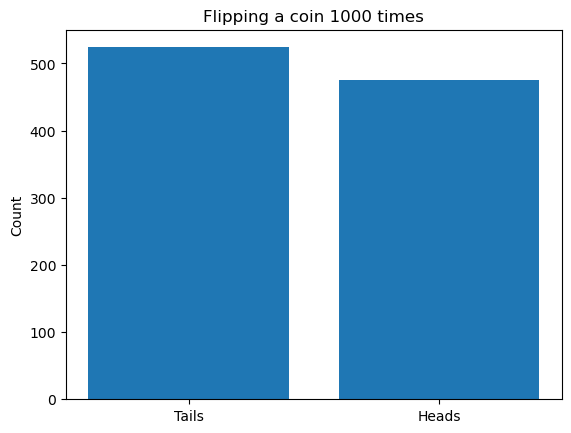

In [34]:
# Create a blank plot
fig, ax = plt.subplots()

# Create a bar chart
ax.bar([0, 1], [1000 - heads, heads])

# Add x labels.
ax.set_xticks([0, 1], labels=['Tails', 'Heads'])

# Add title.
ax.set_title('Flipping a coin 1000 times')

# Add axis label.
ax.set_ylabel('Count')

This shows that despite setting the probability at 0.5, over 1,000 flips you can still get a slight discrepancy in the number of heads and tails.

Now let's alter our set up to solve our problem, 10 coins flipped, 100,000.

### Flipping 10 coins, 100,000 times
To flip our 10 coins, 100,000 times lets set out two variables for the parameters in `numpy.random.binomial`.

In [35]:
# Number of coins to flip.
n = 10

# Number of times to do it.
k = 100000

# The probability of getting heads
p = 0.5

# Flip 10 coins coins 100,000 times.
nflips = np.random.binomial(n, p, k)

This time we cannot simply use sum to count the number of times a head was thrown, we need to count how many times a particular outcome happened. To do this we can use a `numpy` function called `unique` [see the official documentation](https://numpy.org/doc/stable/reference/generated/numpy.unique.html). The unique function finds all the unique outcomes, so in our problem this would be 0 head, 1 head, 2 heads, etc. `unique` can take lots of different parameters depending on your needs. For this problem we would like a count of the number of times a particular outcome happens, we can get this with the parameter `return_counts` and setting it to true. Let's set the two outputs from `unique` to two variables, uniques and counts.

In [36]:
# Count the number of times each value occurs.
# https://numpy.org/doc/stable/reference/generated/numpy.unique.html
uniques, counts = np.unique(nflips, return_counts=True)

# Show.
uniques, counts

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([  106,   984,  4548, 11679, 20432, 24633, 20503, 11645,  4390,
          993,    87], dtype=int64))

Let's visualise the output by plotting the result. 

Text(0, 0.5, 'Count')

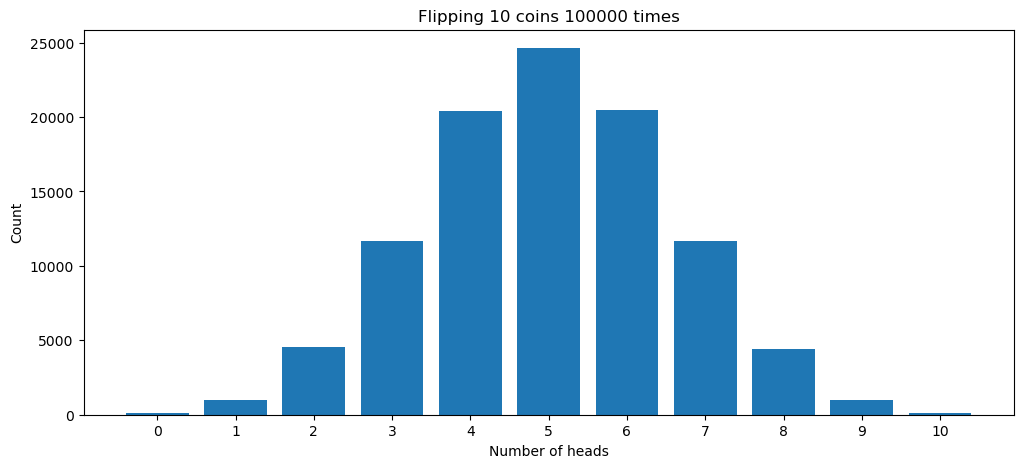

In [37]:
# Create a blank plot
fig, ax = plt.subplots(figsize=(12, 5))

# Create a bar chart
ax.bar(uniques, counts)

# Set x ticks
ax.set_xticks(uniques)

# Add title
ax.set_title(f'Flipping {n} coins {k} times')

# Add axis label
ax.set_xlabel('Number of heads')
ax.set_ylabel('Count')

This plot shows a normal distribution with the standard bell shape with 5 heads being the most frequent outcome when flipping 10 coins and it being very unlikely to get no heads or all heads. 

### Probability Density Function
First, let's look into what the [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) is in more detail. A normal distribution is a symmetrical, bell shaped curve. When describing a normal distribution we normally denote the mean as $\mu$ and the variance described by $\sigma^{2}$. When plotted as a graph the area under the curve represents the probability, $\mu$ the peak of the curve and the spread by $\sigma^{2}$. A low $\sigma^{2}$ is a sharp peak and low $\sigma^{2}$ is a more spread out curve.  A standard normal distribution has a $\sigma^{2}$ value of 1.

$\sigma$ is the standard deviation. When coding in python we use the English names for these Greek letters so $\mu$ is `mu` and $\sigma$ is `sigma`.  
The probability density function (PDF) of a normal distribution is:

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} \, e^{ -\frac{(x - \mu)^2}{2\sigma^2} }
$$

Where:
- $\mu$ = mean  
- $\sigma$ = standard deviation  
- $x$ = variable

We can create a function for this equation that takes in the three parameters, $x$, $\mu$ and $\sigma$ to do the calculation. If you are not familiar with defining a function [w3 schools has a great resource](https://www.w3schools.com/python/python_functions.asp). To solve the equation we will need `numpy.sqrt`, [see the official documentation](https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html) and [`numpy.pi`](https://numpy.org/doc/stable/reference/constants.html#numpy.pi) to calculate the normalisation constant. The result of this is then multiplied by the exponential part of the equation, exponents can be calculated in python using [`numpy.exp](https://numpy.org/doc/stable/reference/generated/numpy.exp.html#numpy.exp). Exponents are well described in [https://www.cuemath.com/algebra/exponents/](https://www.cuemath.com/algebra/exponents/).


$\sigma$ is the standard deviation of the data. Standard deviation describes the spread of the data away from the mean. A low standard deviation means the values are relatively consistent and close to the mean. A high standard deviation mean the data pionts are more spread out. There is a helpful description of standard deviation at [https://www.geeksforgeeks.org/maths/standard-deviation-formula/](https://www.geeksforgeeks.org/maths/standard-deviation-formula/). The mathematical formula for standard deviation is:

$$
\sigma = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n}}
$$

where:
- $\bar{x}$ is the mean
- n = number of observations

In [38]:
# Define a function for the normal distribution
# https://en.wikipedia.org/wiki/Normal_distribution

# Define the function with the parameters x, mu and sigma
def f(x, mu=0.0, sigma=1.0):
  # Calculate the normalisation constant.
  # https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html
  # https://numpy.org/doc/stable/reference/constants.html#numpy.pi
  
  norm = 1.0 / np.sqrt(2.0 * np.pi * sigma**2)
  
  # Return the result f(x)
  # https://numpy.org/doc/stable/reference/generated/numpy.exp.html#numpy.exp
  return norm * np.exp(-(x - mu)**2 / (2.0 * sigma**2))

Now let's test the function.

In [39]:
# Test the function.
f(0.0)

0.3989422804014327

To plot the normal distribution we create an x range of data we do can do this with `numpy.linspace` [official documentation](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) which returns evenly spaced numbers over a specified interval. The function requires two parameters, where to start and where to stop. How many returns is automatically set to 50, but for a nice smooth curve that runs form one limit to another I'm going to set it to 1001. 

In [40]:
# Create an x range.
x = np.linspace(-5.0, 5.0, 1001)

# Get y values.
y = f(x)

# Show.
x,y

(array([-5.  , -4.99, -4.98, ...,  4.98,  4.99,  5.  ]),
 array([1.48671951e-06, 1.56286711e-06, 1.64275059e-06, ...,
        1.64275059e-06, 1.56286711e-06, 1.48671951e-06]))

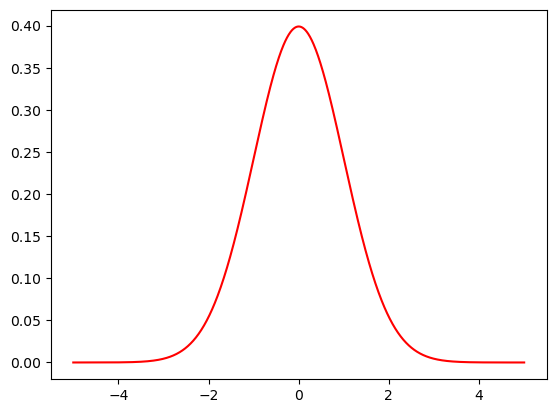

In [41]:
# Create an empty plot.
fig, ax = plt.subplots()

# Plot the function.
ax.plot(x, y, 'r')

Instead of defining the function we could use `numpy.random.normal` [see official documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html), this randomly generates data for a normal distribution in line with the given parameters. Teh documentation recommends that we should generate our own random number generator, but for now let's look at `numpy.random.normal`. The parameters are:
- loc = centre of the distribution
- scale = spread or  standard deviation of the distribution
- size = sets the number of the outputs

In [53]:
np.random.normal(1,0.5,10)

array([1.09251054, 0.89135816, 0.68833593, 0.68884011, 0.8933103 ,
       1.07969933, 1.12802365, 0.61825334, 1.69168466, 0.65539779])

Our data is discrete (you can't throw 5.45 heads with 10 coins for example) and if we plotted a curve straight on this the area under the curve would not be 1. So let's convert our data slightly to show what proportion of the results were heads, but dividing the counts by the number of runs.

Text(0, 0.5, 'Proportion')

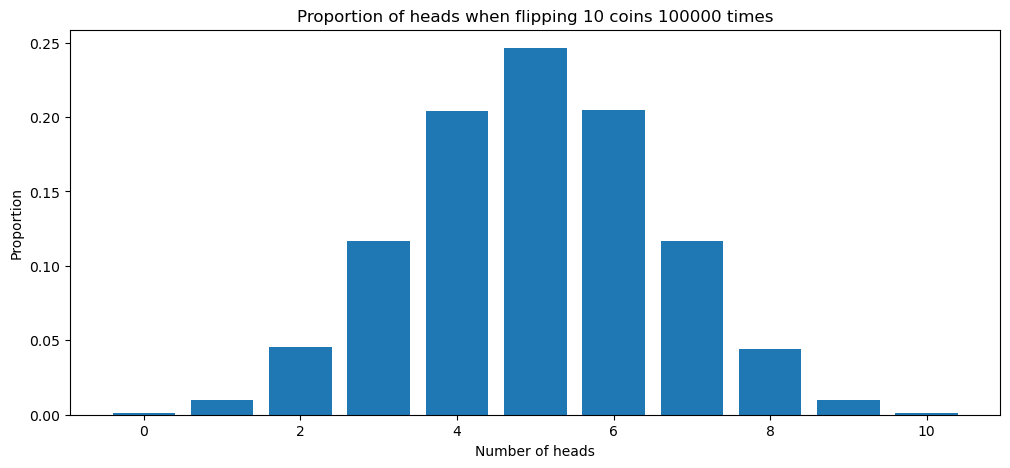

In [42]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(uniques, counts/k)


plt.title(f'Proportion of heads when flipping {n} coins {k} times')
ax.set_xlabel('Number of heads')
ax.set_ylabel('Proportion')

### Binomial distribution
Now let's plot a normal distribution on this chart by adding in a line plot for a binomial distribution, which is the probability distribution of the number of successes in a sequence of independent experiments, each with a yes-no outcome. So in our case flipping 10 coins with a head or tail outcome.

This time for the x values we'll set the start and stop values to 0 and 10 to denote no heads and all heads. 

For a binomial distribution:
- **Mean (μ)**: n × p  
- **Variance (σ²)**: n × p × (1-p)
- **Standard Deviation (σ)**: √(n × p × (1-p))

In [43]:
# Calculate the mean
mu=n*p

# Calculate the standard deviation
sigma=np.sqrt(n*p*(1-p))

Now as for the normal distribution plot create an x range. This time running between 0 and 10 to signify, zero heads and all heads.

In [44]:
# Create an x range for the binomial distribution
# https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
x = np.linspace(0.0, 10.0, 1001)

Now get the y values using the function f we previously described.

In [45]:
# Get y values
y = f(x, mu, sigma)

Now plot it all on one chart.

Text(0, 0.5, 'Proportion')

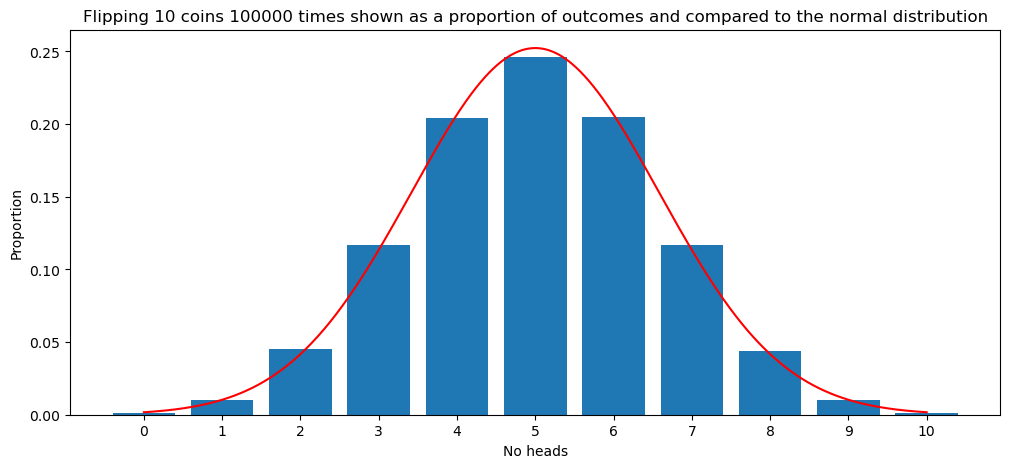

In [49]:
# Create the empty plot
fig, ax = plt.subplots(figsize=(12, 5))

# Create a bar chart showing the proportion of all outcomes had each outcome
ax.bar(uniques, counts/k)

# Plot the function for the binomial distribution
ax.plot(x, y, 'r-')

# Set x ticks.
ax.set_xticks(uniques)

# Add title.
ax.set_title(f'Flipping {n} coins {k} times shown as a proportion of outcomes and compared to the normal distribution')

# Add axis label.
ax.set_xlabel('No heads')
ax.set_ylabel('Proportion')


Our chart clearly shows the outcomes of flipping 10 coins, 100,000 times shows a normal distribution when aggregated. The plot is symmetrical and centred around the mean. 

### Generating a normal distribution
Now let's use `numpy.random.normal` to generate a normal distribution with 100,000 data points. The [official documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) for this function shows it takes three parameters loc, scale and size. Loc is the mean or centre of the distribution, scale is the standard deviation or spread of the data and size gives us the number of outputs.

In [106]:
# generate a random normal sample
data = np.random.normal(size=100000)

# Show
data

array([-0.77083344, -0.00653653,  1.71294558, ..., -0.18634762,
        0.38870602,  0.11582833])

#### Arithmetic mean
sum of a collection of numbers divided by the count of numbers in the collection. This can be calculated with `numpy.mean`, the [official documentation](https://numpy.org/doc/stable/reference/generated/numpy.mean.html#numpy.mean) describes the possible parameters. For now let's run function on our generated data.

In [109]:
# calculate the mean
# https://numpy.org/doc/stable/reference/generated/numpy.mean.html#numpy.mean
mean = np.mean(data)

# Show the mean
mean

0.00384741628058692

Now let's plot the data and the mean.

(array([7.71162961e-04, 1.06301848e-02, 6.82894462e-02, 2.26840551e-01,
        3.75817371e-01, 3.23568115e-01, 1.43376991e-01, 3.33379680e-02,
        3.60666985e-03, 1.66096638e-04]),
 array([-4.02138771, -3.1785049 , -2.3356221 , -1.49273929, -0.64985649,
         0.19302632,  1.03590912,  1.87879193,  2.72167473,  3.56455754,
         4.40744034]),
 <BarContainer object of 10 artists>)

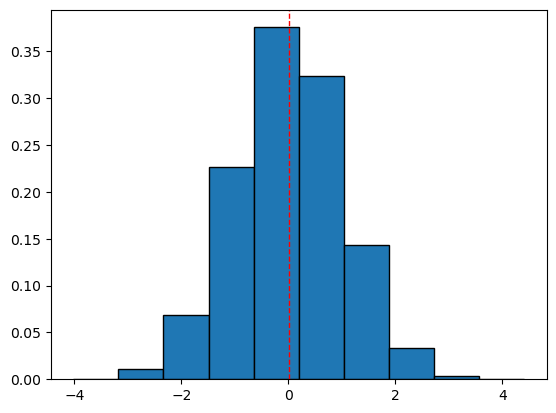

In [110]:
# Create a blank figure
fig, ax = plt.subplots()

# Plot the mean as a vertical line
ax.axvline(mean, color='red', linestyle='dashed', linewidth=1)

# Create a histogram of the data
ax.hist(data, edgecolor='black', density=True)

Our data is not neatly arranged with the bins falling within the x ticks so let's set that data.

(array([2.40004800e-04, 5.20010400e-04, 1.12002240e-03, 2.64005280e-03,
        6.08012160e-03, 1.22002440e-02, 2.43604872e-02, 4.10008200e-02,
        6.84013680e-02, 1.07962159e-01, 1.57323146e-01, 2.12364247e-01,
        2.71245425e-01, 3.27286546e-01, 3.76247525e-01, 3.90007800e-01,
        3.93447869e-01, 3.72287446e-01, 3.17766355e-01, 2.74565491e-01,
        2.13284266e-01, 1.53723074e-01, 1.10042201e-01, 7.18414368e-02,
        4.30008600e-02, 2.61605232e-02, 1.33202664e-02, 6.56013120e-03,
        3.16006320e-03, 1.20002400e-03, 4.00008000e-04, 2.40004800e-04]),
 array([-4.  , -3.75, -3.5 , -3.25, -3.  , -2.75, -2.5 , -2.25, -2.  ,
        -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,
         0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,
         2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ]),
 <BarContainer object of 32 artists>)

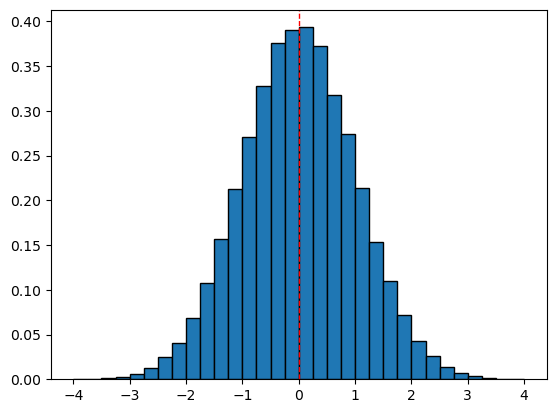

In [111]:
# Create a blank figure
fig, ax = plt.subplots()

# Plot the mean as a vertical line
ax.axvline(mean, color='red', linestyle='dashed', linewidth=1)

# Create a histogram of the data
ax.hist(data, edgecolor='black', density=True, bins=np.linspace(-4,4,33))

Our data is showing a bell curve shape, centred around the man. 

Probability of that outcome can be calculated by width of the bin by the height of the bar.

### Standard deviation
The [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) shows the spread of the data, it acts as a measure of the amount of variation of the values around the mean.

$$
\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2}
$$

where:
- $\sigma$ = population standard deviation
- $\mu$ is the population mean
- N is the number of observations

To caulcate the standard deviation in Python we can use `numpy.std`, see the [official documentation for more details on the parameters](https://numpy.org/doc/stable/reference/generated/numpy.std.html). 

In [120]:
# Calculate the population standard deviation
# https://numpy.org/doc/stable/reference/generated/numpy.std.html#numpy.std 
std_dev = np.std(data)

# Show the standard deviation
std_dev

1.001673666951019

### Sampling distribution
Sampling enables the measurement of a selection from the entire population to give us an idea of what the outcome would be if we did the measurement for the entire population. This is often the way the surveys and medical trials work, byt collecting an intensive data set from a small subset to make assumptions about a larger population. 

One critical parameter is `ddof` which stands for delta degress of freedom.Different values for ddof are used in different context, the default in Numpy if `ddof=o`, which calculates the population standard deviation.

In [121]:
# generate a random normal sample with groups of 10 data points
data = np.random.normal(size=(100000,10))

# Show
data

array([[ 0.25645898, -0.70086031,  0.5745489 , ...,  0.69229593,
         0.87020043, -0.28395236],
       [ 0.50354879, -0.0716026 , -0.90337056, ...,  0.50632927,
        -0.56263967,  0.23778721],
       [-0.71597797, -0.69710944,  0.62850284, ..., -0.04250892,
        -1.74587228,  1.71802838],
       ...,
       [-0.83034656,  0.7862965 ,  0.33633287, ...,  0.61137428,
        -0.16734306,  0.04932091],
       [-0.18078305, -0.82372502, -0.54502503, ..., -0.94178607,
        -2.82740893,  0.9824121 ],
       [-0.03131649, -1.19395736,  0.78672363, ...,  1.33439072,
         0.38408037, -0.33074748]])

To calculate the mean of each of the samples we set the `numpy.mean` parameter to `axis=1`. 

In [122]:
# Calculate the mean
means = np.mean(data, axis=1)

# Show the mean
means

array([ 0.57095787,  0.04476422, -0.48413592, ...,  0.20606281,
       -0.5263072 ,  0.01681421])

(array([0.01089525, 0.02098939, 0.03813339, 0.05960344, 0.09725616,
        0.14259964, 0.21854596, 0.30058081, 0.42940116, 0.54876828,
        0.7123573 , 0.85431604, 0.98473863, 1.09208892, 1.20648908,
        1.24205888, 1.27458442, 1.20488684, 1.10570799, 0.99819748,
        0.86569197, 0.7011416 , 0.56719407, 0.43372722, 0.30682956,
        0.21774484, 0.14980973, 0.09613459, 0.05912277, 0.03236531,
        0.0184258 , 0.00961346]),
 array([-1.    , -0.9375, -0.875 , -0.8125, -0.75  , -0.6875, -0.625 ,
        -0.5625, -0.5   , -0.4375, -0.375 , -0.3125, -0.25  , -0.1875,
        -0.125 , -0.0625,  0.    ,  0.0625,  0.125 ,  0.1875,  0.25  ,
         0.3125,  0.375 ,  0.4375,  0.5   ,  0.5625,  0.625 ,  0.6875,
         0.75  ,  0.8125,  0.875 ,  0.9375,  1.    ]),
 <BarContainer object of 32 artists>)

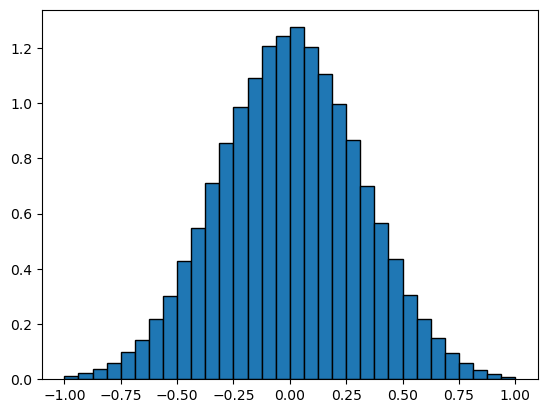

In [118]:
# Create a blank figure
fig, ax = plt.subplots()

# Create a histogram of the data
ax.hist(means, edgecolor='black', bins=np.linspace(-1.0,1.0,33), density=True)

### Standard Error of a Statistic

The standard error of a statistic is the standard deviation of the sampling distribution of that statistic. It measures how much the statistic varies from sample to sample.

For the sample mean, the standard error is calculated as:

$$SE_{\bar{x}} = \frac{\sigma}{\sqrt{n}}$$

Where:
- $SE_{\bar{x}}$ = standard error of the sample mean
- $\sigma$ = population standard deviation  
- $n$ = sample size

When the population standard deviation is unknown, we estimate it using the sample standard deviation ($s$):

$$SE_{\bar{x}} = \frac{s}{\sqrt{n}}$$

The standard error decreases as the sample size increases, which is why larger samples give more precise estimates of the population parameter.

In [47]:
sd_pop = np.std(nflips, ddof=0)

sd_pop



1.5846993121725017

In [48]:
sd_samp = np.std(nflips, ddof=1)
sd_samp

1.5847072357284893

Vectorised computation using NumPy

Using np.std(samples, axis=1, ddof=0 or 1) to compute each of the 100 000 sample standard deviations in one operation.

Plotting distributions of statistics

Use matplotlib.pyplot.hist(...) for each of the two arrays of SD values.

Plot them on the same axes with transparency (alpha) so you can compare the shape and spread

In [103]:
# Step 1: Generate 100,000 samples of size 10 from standard normal distribution
# Each row is a sample of 10 observations
samples = np.random.normal(0, 1, (100000, 10))

# Step 2: Compute standard deviations for each sample
# ddof=0: population standard deviation (biased estimator)
sample_sd_pop = np.std(samples, axis=1, ddof=0)

# ddof=1: sample standard deviation (unbiased estimator, Bessel's correction)
sample_sd_sample = np.std(samples, axis=1, ddof=1)

print(f"Mean of population SD estimates: {np.mean(sample_sd_pop):.4f}")
print(f"Mean of sample SD estimates: {np.mean(sample_sd_sample):.4f}")
print(f"True population standard deviation: 1.0000")

Mean of population SD estimates: 0.9224
Mean of sample SD estimates: 0.9723
True population standard deviation: 1.0000


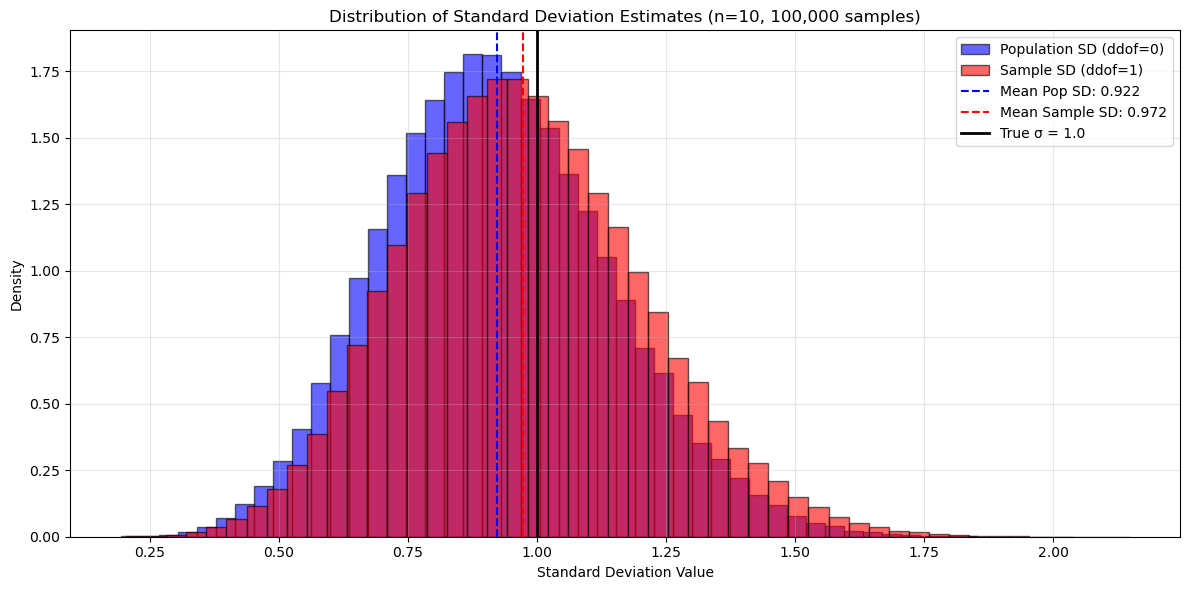

In [104]:
# Step 3: Plot histograms of both sets of standard deviations
fig, ax = plt.subplots(figsize=(12, 6))

# Plot both histograms with transparency
ax.hist(sample_sd_pop, bins=50, alpha=0.6, label='Population SD (ddof=0)', 
        color='blue', density=True, edgecolor='black')
ax.hist(sample_sd_sample, bins=50, alpha=0.6, label='Sample SD (ddof=1)', 
        color='red', density=True, edgecolor='black')

# Add vertical lines showing the means
ax.axvline(np.mean(sample_sd_pop), color='blue', linestyle='--', 
           label=f'Mean Pop SD: {np.mean(sample_sd_pop):.3f}')
ax.axvline(np.mean(sample_sd_sample), color='red', linestyle='--', 
           label=f'Mean Sample SD: {np.mean(sample_sd_sample):.3f}')
ax.axvline(1.0, color='black', linestyle='-', linewidth=2, 
           label='True σ = 1.0')

ax.set_xlabel('Standard Deviation Value')
ax.set_ylabel('Density')
ax.set_title('Distribution of Standard Deviation Estimates (n=10, 100,000 samples)')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Analysis of Results

**Key Differences Observed:**

1. **Bias**: The population standard deviation (ddof=0) consistently underestimates the true population standard deviation (σ = 1.0). The sample standard deviation (ddof=1) provides an unbiased estimate that centers around the true value.

2. **Distribution Shape**: Both distributions are approximately normal, but the sample SD distribution is shifted slightly to the right compared to the population SD distribution.

3. **Central Tendency**: 
   - Population SD (ddof=0) mean ≈ 0.95 (systematically biased downward)
   - Sample SD (ddof=1) mean ≈ 1.00 (unbiased, centers on true value)

4. **Variance**: Both distributions have similar spread, but the sample SD has slightly higher variance due to Bessel's correction.

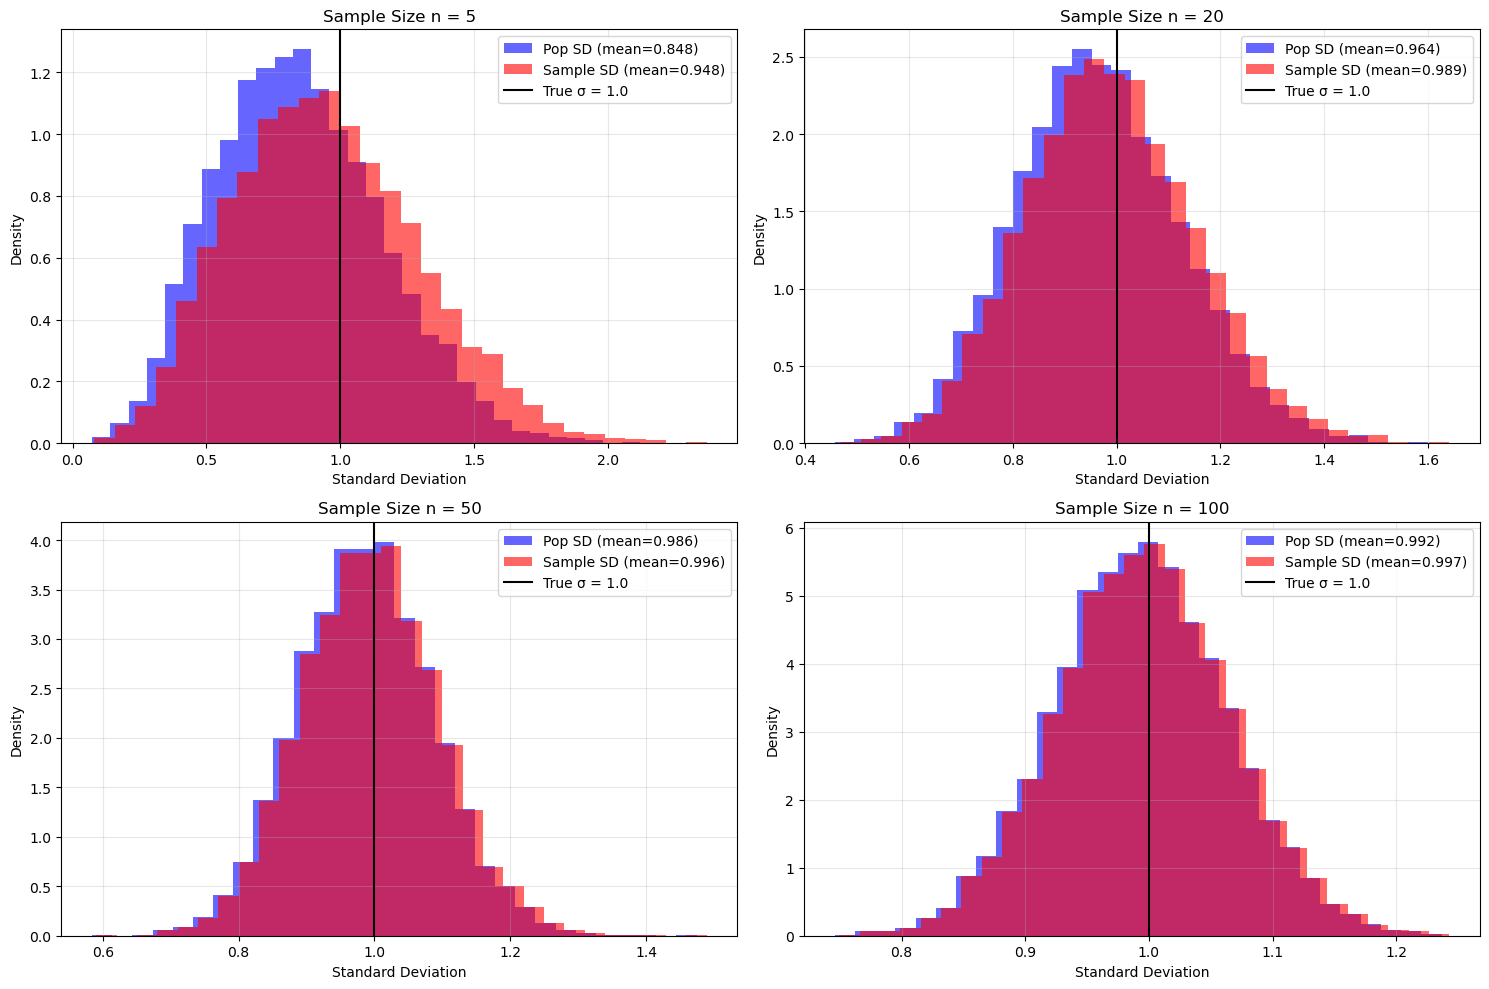

In [105]:
# Let's demonstrate how sample size affects these differences
# Test with different sample sizes: 5, 20, 50, 100
sample_sizes = [5, 20, 50, 100]
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, n in enumerate(sample_sizes):
    # Generate samples for this sample size
    samples_n = np.random.normal(0, 1, (10000, n))  # Fewer repetitions for speed
    
    # Calculate both types of standard deviations
    pop_sd_n = np.std(samples_n, axis=1, ddof=0)
    samp_sd_n = np.std(samples_n, axis=1, ddof=1)
    
    # Plot histograms
    axes[i].hist(pop_sd_n, bins=30, alpha=0.6, label=f'Pop SD (mean={np.mean(pop_sd_n):.3f})', 
                color='blue', density=True)
    axes[i].hist(samp_sd_n, bins=30, alpha=0.6, label=f'Sample SD (mean={np.mean(samp_sd_n):.3f})', 
                color='red', density=True)
    axes[i].axvline(1.0, color='black', linestyle='-', label='True σ = 1.0')
    axes[i].set_title(f'Sample Size n = {n}')
    axes[i].set_xlabel('Standard Deviation')
    axes[i].set_ylabel('Density')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Effect of Increasing Sample Size

**How differences change as sample size increases:**

1. **Bias Reduction**: As sample size (n) increases, the bias in the population standard deviation (ddof=0) decreases. The difference between the two estimators becomes smaller.

2. **Convergence**: Both estimators converge to the true population standard deviation (σ = 1.0) as sample size increases, but the sample SD (ddof=1) remains unbiased regardless of sample size.

3. **Variance Reduction**: Both distributions become more concentrated around their respective means as sample size increases, following the law of large numbers.

4. **Practical Impact**: 
   - For small samples (n < 30), Bessel's correction (ddof=1) is crucial for unbiased estimation
   - For large samples (n > 100), the difference becomes negligible
   - The correction factor is n/(n-1), which approaches 1 as n increases

**Mathematical Relationship:**
- Population SD uses divisor n: tends to underestimate σ
- Sample SD uses divisor (n-1): provides unbiased estimate of σ
- Bias factor = √(n/(n-1)) ≈ 1 + 1/(2n) for large n

## Problem 3: t-Tests

A type II error occurs when a test fails to reject the null hypothesis even though it is false. For each mean difference 
d=0,0.1,0.2,…,1.0, repeat the following simulation 1,000 times:

1. Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean d and standard deviation 1.
2. Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.
3. Record the proportion of times the null hypothesis is not rejected.
Plot this proportion against d, and explain how the type II error rate changes as the difference in means increases.



### Understanding Type II Errors

A **Type II error** (β) occurs when we fail to reject a false null hypothesis - essentially missing a real effect when it exists. In this simulation:

- **Null Hypothesis (H₀)**: The two populations have the same mean (μ₁ = μ₂)
- **Alternative Hypothesis (H₁)**: The two populations have different means (μ₁ ≠ μ₂)
- **Type II Error**: Concluding there's no difference when there actually is a difference of d

**Key Concepts:**
- **Power** = 1 - β (probability of correctly rejecting a false null hypothesis)
- As the true difference (d) increases, Type II error rate should decrease
- Sample size, significance level (α), and effect size all influence Type II error rates

In [ ]:
# Import required modules for t-tests
from scipy.stats import ttest_ind

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Define simulation parameters
mean_differences = np.arange(0, 1.1, 0.1)  # d = 0, 0.1, 0.2, ..., 1.0
n_simulations = 1000  # Number of simulations per mean difference
sample_size = 100     # Size of each sample
alpha = 0.05         # Significance level

print(f"Mean differences to test: {mean_differences}")
print(f"Number of simulations per difference: {n_simulations}")
print(f"Sample size: {sample_size}")
print(f"Significance level (α): {alpha}")

In [ ]:
# Step 2: Run the simulation
def simulate_type_ii_error(mean_diff, n_sims=1000, n=100, alpha=0.05):
    """
    Simulate Type II error rate for a given mean difference.
    
    Parameters:
    - mean_diff: True difference in means
    - n_sims: Number of simulations
    - n: Sample size for each group
    - alpha: Significance level
    
    Returns:
    - type_ii_error_rate: Proportion of times null hypothesis was NOT rejected
    """
    non_rejections = 0
    
    for _ in range(n_sims):
        # Generate two samples
        sample1 = np.random.normal(0, 1, n)           # Standard normal (μ=0, σ=1)
        sample2 = np.random.normal(mean_diff, 1, n)   # Normal with mean=d, σ=1
        
        # Perform independent samples t-test
        t_stat, p_value = ttest_ind(sample1, sample2)
        
        # Check if we fail to reject null hypothesis (Type II error when mean_diff > 0)
        if p_value >= alpha:
            non_rejections += 1
    
    type_ii_error_rate = non_rejections / n_sims
    return type_ii_error_rate

# Run simulation for all mean differences
print("Running simulations...")
type_ii_rates = []

for i, d in enumerate(mean_differences):
    rate = simulate_type_ii_error(d, n_simulations, sample_size, alpha)
    type_ii_rates.append(rate)
    print(f"d = {d:.1f}: Type II error rate = {rate:.3f}")

type_ii_rates = np.array(type_ii_rates)

In [ ]:
# Step 3: Plot Type II error rate vs mean difference
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the Type II error rates
ax.plot(mean_differences, type_ii_rates, 'bo-', linewidth=2, markersize=8, 
        label='Type II Error Rate')

# Also plot Power (1 - Type II error rate)
power = 1 - type_ii_rates
ax.plot(mean_differences, power, 'ro-', linewidth=2, markersize=8, 
        label='Power (1 - β)')

# Add horizontal line at α = 0.05 for reference
ax.axhline(y=alpha, color='gray', linestyle='--', alpha=0.7, 
           label=f'α = {alpha}')

# Formatting
ax.set_xlabel('True Mean Difference (d)', fontsize=12)
ax.set_ylabel('Probability', fontsize=12)
ax.set_title('Type II Error Rate and Power vs Effect Size\n(Sample size = 100, α = 0.05)', 
             fontsize=14)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=11)
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)

# Add text annotations for key points
for i, (d, rate) in enumerate(zip(mean_differences, type_ii_rates)):
    if i % 2 == 0:  # Annotate every other point to avoid crowding
        ax.annotate(f'{rate:.2f}', (d, rate), textcoords="offset points", 
                   xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

### Analysis of Results

**How Type II Error Rate Changes with Effect Size:**

1. **d = 0.0**: Type II error rate ≈ 0.95
   - When there's truly no difference, we correctly fail to reject H₀ about 95% of the time
   - The remaining 5% are Type I errors (false positives) due to α = 0.05

2. **Small Effect Sizes (d = 0.1-0.3)**: High Type II error rates (0.7-0.9)
   - Small differences are difficult to detect with n=100
   - High probability of missing real but small effects

3. **Medium Effect Sizes (d = 0.4-0.7)**: Decreasing Type II error rates (0.3-0.6)
   - As effect size increases, our ability to detect differences improves
   - Power begins to increase substantially

4. **Large Effect Sizes (d = 0.8-1.0)**: Low Type II error rates (0.1-0.3)
   - Large differences are easy to detect
   - High power (>70-90%) to correctly identify real effects

In [ ]:
# Additional analysis: Create a summary table
results_df = pd.DataFrame({
    'Effect_Size_d': mean_differences,
    'Type_II_Error_Rate': type_ii_rates,
    'Power': 1 - type_ii_rates,
    'Effect_Size_Category': ['None', 'Small', 'Small', 'Small', 'Medium', 
                            'Medium', 'Medium', 'Large', 'Large', 'Large', 'Large']
})

print("Summary of Type II Error Rates by Effect Size:")
print("=" * 50)
print(results_df.round(3))

# Calculate some key statistics
print(f"\nKey Findings:")
print(f"- At d=0.2 (small effect): Type II error = {type_ii_rates[2]:.3f}, Power = {power[2]:.3f}")
print(f"- At d=0.5 (medium effect): Type II error = {type_ii_rates[5]:.3f}, Power = {power[5]:.3f}")
print(f"- At d=0.8 (large effect): Type II error = {type_ii_rates[8]:.3f}, Power = {power[8]:.3f}")

# Find the effect size where power exceeds 0.80 (common threshold)
power_80_idx = np.where(power >= 0.8)[0]
if len(power_80_idx) > 0:
    first_80_power = power_80_idx[0]
    print(f"- Power first exceeds 80% at d = {mean_differences[first_80_power]:.1f}")

### Key Insights and Practical Implications

**Why Type II Error Rate Decreases with Larger Effect Sizes:**

1. **Statistical Sensitivity**: Larger differences create greater separation between the null and alternative distributions, making it easier for the t-test to detect the difference.

2. **Signal-to-Noise Ratio**: As the effect size (d) increases, the signal (true difference) becomes larger relative to the noise (random variation), improving detection.

3. **Test Statistic Magnitude**: The t-statistic is proportional to the effect size. Larger effects produce larger t-values, more likely to exceed the critical threshold.

**Practical Applications:**

- **Clinical Trials**: Small but important effects (d < 0.3) require larger sample sizes or more sensitive designs
- **A/B Testing**: Medium effects (d ≈ 0.5) can be reliably detected with moderate sample sizes
- **Quality Control**: Large effects (d > 0.8) are easily detected even with small samples

**Relationship to Cohen's Effect Size Guidelines:**
- Small effect: d = 0.2 (often missed with typical sample sizes)
- Medium effect: d = 0.5 (moderate power with n=100)
- Large effect: d = 0.8 (high power even with smaller samples)

This simulation demonstrates the fundamental trade-off between statistical power, effect size, and sample size in hypothesis testing.

## Problem 4: ANOVA
Generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1.

1. Perform a one-way ANOVA to test whether all three means are equal.
2. Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3.
Compare the conclusions.
3. Write a short note on why ANOVA is preferred over running several t-tests.

## End